In [0]:
spark


SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.functions import *

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,IntegerType,StringType,DateType,BooleanType,DecimalType

In [0]:
 ball_by_ball_schema=StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])


In [0]:
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
%fs ls dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017


path,name,size,modificationTime
dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Ball_By_Ball.csv,Ball_By_Ball.csv,25099132,1719231724000
dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Match.csv,Match.csv,113358,1719231713000
dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Player.csv,Player.csv,34614,1719231714000
dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Player_match.csv,Player_match.csv,2664692,1719231717000
dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Team.csv,Team.csv,343,1719231718000
dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/workspace,workspace,16014,1719231718000


In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Ball_By_Ball.csv")

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # YearType() can be used if PySpark supports it directly
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Match.csv")

In [0]:
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab| Chennai

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])
player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Player.csv")

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 0), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # YearType() can be used if PySpark supports it directly
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])
player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Player_match.csv")

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])
team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("dbfs:/FileStore/ipl_dataset_till_2017/raghu543-ipl-data-till-2017/Team.csv")


In [0]:
#Filter to include only valid deleveries(excluding wides and no balls)
ball_by_ball_df = ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
#aggregation: calculate total and avg runs scored in each match and innings
total_and_avg_runs = ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)

In [0]:
#Window func: Calculate running total of runs in each match for each over
WindowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_totsl_runs",
    sum("runs_scored").over(WindowSpec)
)


In [0]:
#conditional column: high impact balls(either wicket or more than 6 runs includinf extras)

ball_by_ball_df = ball_by_ball_df.withColumn(
    "High_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket")== True),True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
from pyspark.sql.functions import year,month,dayofmonth,when
#Extracting data from match date for detailed time based analysis
match_df = match_df.withColumn("year",year("match_date"))
match_df = match_df.withColumn("month",month("match_date"))
match_df = match_df.withColumn("day",dayofmonth("match_date"))

#Categorizing win margin
match_df = match_df.withColumn(
    "Win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

#Analyze impact of toss: who wins toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"),"Yes").otherwise("No")
)

#Showing Enhanced match dataframe
match_df.show(10)




+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|year|month| day|Win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|  

In [0]:
toss_and_match_winners_df = match_df.filter(match_df.toss_match_winner == "Yes")
result_df = toss_and_match_winners_df.select("season_year", "toss_winner","win_type","win_margin").limit(20)
display(result_df)

season_year,toss_winner,win_type,win_margin
2008,Chennai Super Kings,runs,33
2008,Rajasthan Royals,wickets,3
2008,Rajasthan Royals,wickets,7
2008,Deccan Chargers,wickets,10
2008,Chennai Super Kings,runs,13
2008,Kings XI Punjab,wickets,7
2008,Rajasthan Royals,runs,45
2008,Kings XI Punjab,runs,9
2008,Kings XI Punjab,wickets,6
2008,Deccan Chargers,wickets,7


Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import lower, regexp_replace
#Cleaning player names 

player_df = player_df.withColumn("player_name",lower(regexp_replace("player_name", "[^a-z A-Z 0-9 ]", " ")))
 #lower(regexp_replace("player_name", "[^a-z A-Z 0-9 ]", " ")))


#handling missing values in "batting hand" and "bowling skill"
player_df = player_df.na.fill({"batting_hand":"unknown","bowling_skill":"unknown"})

#Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Left"),"Left-Handed").otherwise("Right-Handed")
    
)
player_df.show(20,truncate=False)
#player_df.show(20)

+---------+---------+---------------+----+--------------+----------------------+------------+-------------+
|player_sk|player_id|player_name    |dob |batting_hand  |bowling_skill         |country_name|batting_style|
+---------+---------+---------------+----+--------------+----------------------+------------+-------------+
|0        |1        |sc ganguly     |null|Left-hand bat |Right-arm medium      |India       |Left-Handed  |
|1        |2        |bb mccullum    |null|Right-hand bat|Right-arm medium      |New Zealand |Right-Handed |
|2        |3        |rt ponting     |null|Right-hand bat|Right-arm medium      |Australia   |Right-Handed |
|3        |4        |dj hussey      |null|Right-hand bat|Right-arm offbreak    |Australia   |Right-Handed |
|4        |5        |mohammad hafeez|null|Right-hand bat|Right-arm offbreak    |Pakistan    |Right-Handed |
|5        |6        |r dravid       |null|Right-hand bat|Right-arm offbreak    |India       |Right-Handed |
|6        |7        |w jaffe

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")
     

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
WITH ranked_batsmen AS (
    SELECT 
        p.player_name,
        m.season_year,
        SUM(b.runs_scored) AS total_runs,
        ROW_NUMBER() OVER (PARTITION BY m.season_year ORDER BY SUM(b.runs_scored) DESC) AS rank
    FROM ball_by_ball b
    JOIN match m ON b.match_id = m.match_id   
    JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
    JOIN player p ON p.player_id = pm.player_id
    GROUP BY p.player_name, m.season_year
)
SELECT player_name, season_year, total_runs
FROM ranked_batsmen
WHERE rank = 1
ORDER BY season_year;
""")

In [0]:
top_scoring_batsmen_per_season.show(10)

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|    se marsh|       2008|       614|
|   ml hayden|       2009|       571|
|sr tendulkar|       2010|       615|
|    ch gayle|       2011|       598|
|    ch gayle|       2012|       720|
|  mek hussey|       2013|       732|
|  rv uthappa|       2014|       659|
|   da warner|       2015|       554|
|     v kohli|       2016|       962|
|   da warner|       2017|       634|
+------------+-----------+----------+



In [0]:
display(top_scoring_batsmen_per_season)

player_name,season_year,total_runs
se marsh,2008,614
ml hayden,2009,571
sr tendulkar,2010,615
ch gayle,2011,598
ch gayle,2012,720
mek hussey,2013,732
rv uthappa,2014,659
da warner,2015,554
v kohli,2016,962
da warner,2017,634


Databricks visualization. Run in Databricks to view.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")


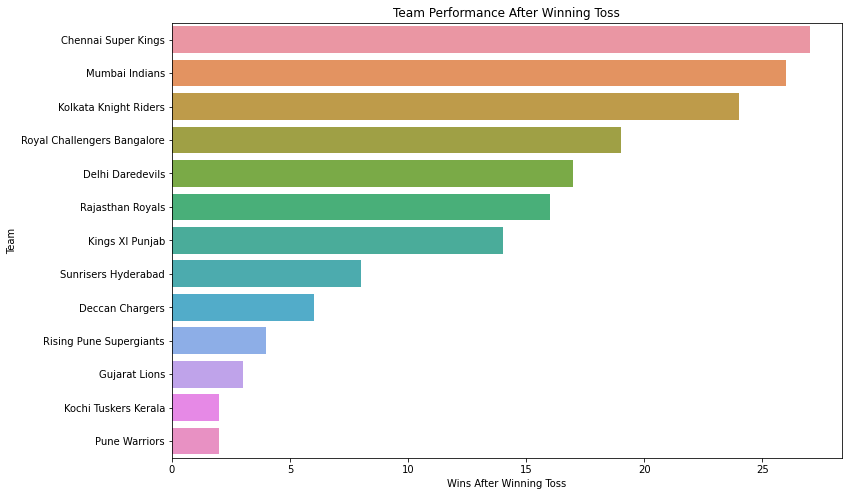

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()


In [0]:
#-- Calculate the total runs per match, innings, and venue
avg_score_by_venues = spark.sql("""
WITH match_innings_scores AS (
    SELECT 
        b.match_id, 
        m.venue_name, 
        b.innings_no,
        SUM(b.runs_scored) AS total_runs
    FROM ball_by_ball b
    JOIN match m ON b.match_id = m.match_id
    GROUP BY b.match_id, m.venue_name, b.innings_no
)

-- Calculate the average and highest scores per venue considering both innings
SELECT 
    venue_name, 
    AVG(total_runs) AS average_score, 
    MAX(total_runs) AS highest_score
FROM match_innings_scores
GROUP BY venue_name
ORDER BY average_score DESC;
""")


In [0]:
avg_score_by_venues.show()

+--------------------+------------------+-------------+
|          venue_name|     average_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 162.9090909090909|          203|
|Punjab Cricket As...|158.71428571428572|          184|
|    Barabati Stadium|155.78571428571428|          221|
|          Green Park|             154.0|          194|
|Maharashtra Crick...|151.03333333333333|          197|
|Rajiv Gandhi Inte...|             151.0|          201|
|Himachal Pradesh ...|150.55555555555554|          200|
|Punjab Cricket As...|148.38571428571427|          230|
|    Wankhede Stadium|148.23684210526315|          227|
|Holkar Cricket St...|             148.1|          191|
|Punjab Cricket As...|             148.0|          204|
|MA Chidambaram St...|146.80612244897958|          240|
|    Feroz Shah Kotla|146.45378151260505|          215|
|M Chinnaswamy Sta...|145.29323308270676|          247|
|Saurashtra Cricke...|145.04545454545453|       

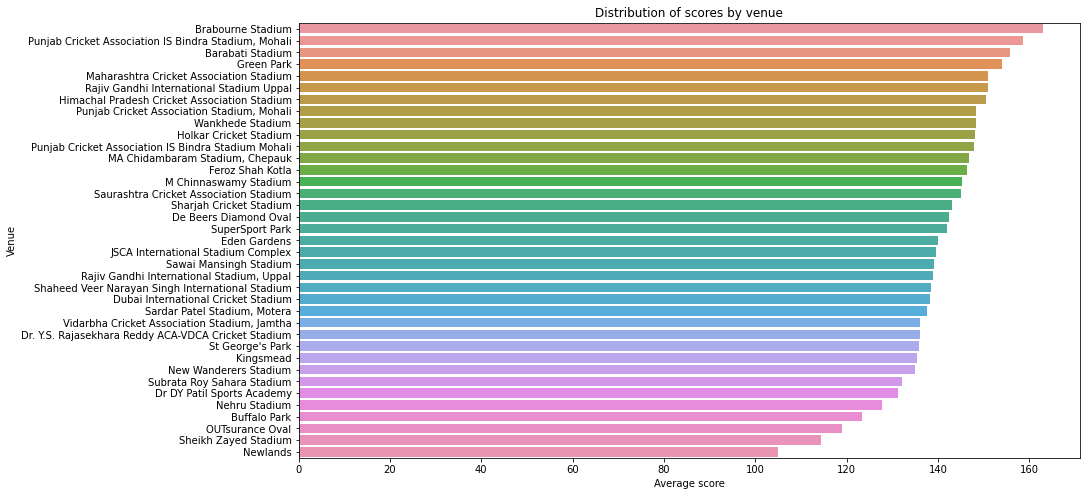

In [0]:
avg_score_by_venues_pd= avg_score_by_venues.toPandas()

plt.figure(figsize=(14,8))
sns.barplot(x='average_score',y='venue_name',data=avg_score_by_venues_pd)
plt.title('Distribution of scores by venue')
plt.xlabel('Average score')
plt.ylabel('Venue')
plt.show()